<h1>Name:-Parmar Umang H.</h1>
<h1>Div:-A</h1>
<h1>Roll No:-40</h1>

In [25]:
#import
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
train.fillna(train.mean(), inplace=True)

In [28]:
test.fillna(test.mean(), inplace=True)

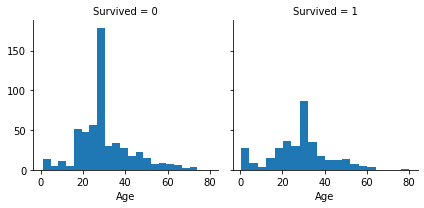

In [29]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [30]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [31]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [32]:
X = np.array(train.drop(['Survived'], 1).astype(float))

In [33]:
y = np.array(train['Survived'])

In [34]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(n_clusters=2)

In [11]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print('\nAccuracy is :- {}'.format(correct/len(X)))


Accuracy is :- 0.49158249158249157


In [35]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [37]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print('\nAccuracy is :- {}'.format(correct/len(X)))


Accuracy is :- 0.6262626262626263
